In [1]:
%load_ext lab_black

# CEVE 101

September 21, 2021

## Today:

1. Logistics:
    1. https://jdossgollin.github.io/F21-CEVE101/calendar/ (see also: Slack bot)
    1. I'm catching up on grading!
    1. Reading for Thursday: finish Masters Ch. 7 (mainly pay attention to sections 7.8-7.10). I will post 2-3 practice problems tonight -- should be shorter than PS5
1. Generating Renewable Energy (from the Sun)
    1. quick recap of reading
    1. numpy and matplotlib
    1. Solving PS5 with Python!

## Setup

1. Opening Jupyter lab in our preferred folder (recap)
1. Creating a notebook

## Today's Lesson

1. Do your best to follow along as we go through, but don't worry if some things don't work -- I will upload this notebook to Canvas!
1. Ask questions!

## Section 7.1

This section is about black body radiation and its relationship with temperature.
We've already discussed this a bit in the context of climate change, but this is a more quantitative discussion.

The key equations are:

*Planck's law*:
$$
E_\lambda = \frac{3.78 \times 10^8}{\lambda^5 \left[\exp \left( \frac{14,400}{\lambda T} \right) - 1 \right]}
$$
*Stefan-Boltzmann law of radiation*:
$$
\frac{E}{A} = \sigma T^4
$$
and *Wien's displacement rule*:
$$
\lambda_\max (\mu \text{m}) = \frac{2898}{T(K)}
$$

### To Cover

1. How to turn an equation into a few lines of code
1. How to turn an equation into a function
1. How to make a plot with matplotlib

In [24]:
sigma = 5.67e-8  # in units of W/m^2 / K^4
T_earth = 273 + 15 # in units of K
sigma * (T_earth ** 4) # in units of W/m^2

390.0793946112

numpy docstring

In [5]:
def stefan_boltzmann_law(temp, area):
    """
    The Stefan-Boltzmann law gives total energy emitted by a black box
    Refer to Masters Equation 7.2
    
    Parameters:
    -----------
    temp: float
        the black body temperature, in degrees K
    area: float
        the surface area of the black body, in square meters
    
    Returns:
    --------
    float
        the total emission rate in Watts
    """
    sigma = 5.67e-8  # in units of W/m^2 / K^4
    energy = area * sigma * (temp ** 4)
    return energy

In [8]:
# from the textbook
area_earth = 5.1e14 # meters squared
energy_earth = stefan_boltzmann_law(temp=T_earth, area=area_earth)
print("Total energy emitted by the earth is", energy_earth, "W")

Total energy emitted by the earth is 1.98940491251712e+17 W


In [9]:
import numpy as np

In [15]:
def plank_law(wavelength_micrometers, temperature_kelvin):
    """
    Calculate the black body radiation for a particular wavelength
    Refer to Masters 7.1
    
    Parameters:
    -----------
    wavelength_micrometers: float
        the wavelength, in micrometers
    
    temperature_kelvin: float
        the absolute temperature of the black body, in Kelvin
    
    Returns:
    --------
    float
        the emissive power per unit area of a black body (W / m2 / micrometer)
    """
    return 3.64e8 / (wavelength_micrometers ** 5 * (np.exp(14_400 / (wavelength_micrometers * temperature_kelvin))))

In [21]:
def wien_displacement(temp):
    """
    The wavelength at which the spectrum has a maximum
    
    Parameters:
    -----------
    temp: float
        the black body temperature
        
    Returns:
    --------
    float
        the wavelength, in micrometers
    """
    return 2898 / temp

In [16]:
import matplotlib.pyplot as plt

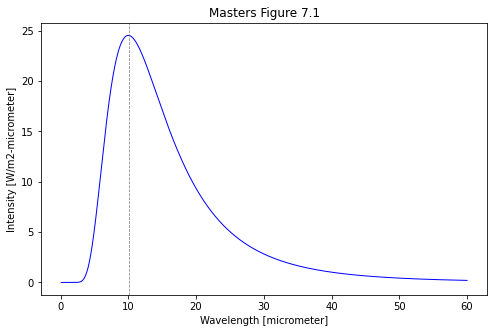

In [23]:
wavelengths = np.linspace(0.1, 60, 1000)
intensities = plank_law(temperature_kelvin=T_earth, wavelength_micrometers=wavelengths)
lambda_max = wien_displacement(T_earth)

plt.figure(figsize=(8, 5))
plt.plot(wavelengths, intensities, color="blue", linewidth=1)
plt.axvline(lambda_max, linestyle="--", color="gray", linewidth=0.75)
plt.xlabel("Wavelength [micrometer]")
plt.ylabel("Intensity [W/m2-micrometer]")
plt.title("Masters Figure 7.1")
plt.show()

## Section 7.2

This section focuses on the Earth's orbit.
The main thing that you need to know is that the distance of the Earth depends on the day of year.
(This is part of why we have seasons -- the bigger factor is tilt).

The key equations are:

the Earth's distance from the sun
$$
d = 1.5 \times 10^8 \left\{ 1 + 0.017 \sin \left[ \frac{360 (n-93)}{365} \right] \right\} \text{km}
$$

### To cover

1. getting day of year with the datetime package
1. functions that call functions

In [25]:
import datetime

In [31]:
my_date = datetime.date(2021, 9, 21)

In [29]:
def day_of_year(date):
    """
    Get the day number for a `datetime.date` object
    
    Parameters:
    -----------
    date:
        A day whose day number you want to find
        
    Returns:
    --------
    int
        the day number
    """
    return date.toordinal() - datetime.date(date.year, 1, 1).toordinal() + 1

In [35]:
today = datetime.date(2021, 9, 21)
day_of_year(today)

264

## Section 7.3

This section focuses on the angle of the sun at "solar noon".
We are introduced to the concept of *declination*:
$$
\delta \approx 23.45^\circ \sin \left[ \frac{360}{365} (n-81) \right]
$$
and the *altitude angle* of the sun at solar noon:
$$
\beta_N = 90^\circ - L + \delta
$$

### To cover

1. Example 7.2

## Section 7.4

We also want to account for the diurnal cycle!
Crucially, the sun's position can be described by:

1. its altitude angle $\beta$
1. its azimuth angle $\phi_s$ (the $s$ is for "sun")


These are related by
$$
\sin \beta = \cos L \cos \delta \cos H + \sin L \sin \delta
$$
and
$$
\sin \phi_S = \frac{\cos \delta \sin H}{\cos \beta}
$$
We also learn about the *hour angle*:
$$
H = \frac{15^\circ}{\text{hour}} \times (\text{hours before solar noon})
$$
last, but not least, we get into the nitty gritty of trig -- recall that there are multiple possible solutions to inverses.
Using our reasoning, we see that

if $\cos H \geq \frac{\tan \delta}{\tan L}$ then $|\phi_S| \leq 90^\circ$; otherwise $|\phi_S| > 90^\circ$.

### To cover

1. if/else
1. list expansions
1. Example 7.3

## Problem 7.1

Using (7.5), determine the following:

1. The date on which the earth will be a maximum distance from the sun
1. The date on which it will be a minimum distance from the sun

In [40]:
def sind(x):
    return np.sin(np.deg2rad(x))


def cosd(x):
    return np.cos(np.deg2rad(x))


def tand(x):
    return np.tan(np.deg2rad(x))


def arcsind(x):
    return np.rad2deg(np.arcsin(x))


def arccosd(x):
    return np.rad2deg(np.arccos(x))

In [41]:
def earth_sun_distance(day_num):
    """
    The Earth's distance from the sun depending on the day number (Masters Eq. 7.5)

    Parameters:
    -----------
    day_num: int
        the day number, with January 1 as day 1 and Dec 31 as day 365

    Returns:
    --------
    float
        the distance from the sun, in million kilometers
    """

    # convert the angle whose sin we take into radians

    d_km = 1.5e8 * (1 + 0.017 * sind(360 * (day_num - 93) / 365))
    return d_km / 1_000_000

In [51]:
all_days = np.linspace(1, 365, 100_000)
distance = earth_sun_distance(all_days)

min_day = all_days[np.argmin(distance)]
max_day = all_days[np.argmax(distance)]
print(min_day, max_day)

1.7498474984749848 184.25035250352505


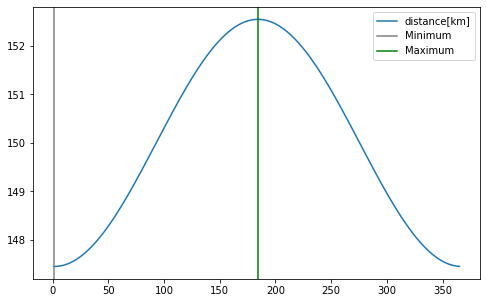

In [50]:
plt.figure(figsize=(8, 5))
plt.plot(all_days, distance, label="distance[km]")
plt.axvline(min_day, label="Minimum", color="gray")
plt.axvline(max_day, label="Maximum", color="green")
plt.legend()
plt.show()

## Problem 7.4

Consider June 21st (the solstice) in Seattle (latitude 47N).
1. Use (7.11) to help find the time of day (solar time) at which the sun will be due West.
1. At that time, what will the altitude angle of the sun be?
1. As a check on the validity of (7.11), use your answers from (a) and (b) in (7.8) and (7.9) to be sure they yield an azimuth angle of 90◦.


In [52]:
declination = 23.45
latitude = 47

$$
\cos H = \frac{\tan \delta}{\tan L}
$$

In [53]:
cos_H = tand(declination) / tand(latitude)
cos_H

0.4045018397622759

In [56]:
time_of_day = -arccosd(cos_H) / 15 # hours
time_of_day

-4.4093390915834645

## Problem 7.5

Calculate altitude and azimuth for

1. March 1st at 10:00 A.M. in New Orleans, latitude 30N
1. July 1st at 5:00 P.M. in San Francisco, latitude 38N
1. December 21st at 11 A.M. at latitude 68